<a href="https://colab.research.google.com/github/cbeutenmueller/barcamp/blob/main/BMI_Barcamp_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training eines Neuronalen Netzes mit Keras / Tensorflow


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


# Import Fashin MNIST dataset:
Das Fashion MNIST dataset beseteht aus 70.000 schwarz-weiß Bildern mit 10 unterschiedlichen Klassen. 60.000 Bilder sind Trainingsmenge, 10.000 Bilder das Testdatenset.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


Die Bilder sind (28x28) Pixel SW als NumPy arrays.
Die Labels sind ein NumPy array mit Integern von 0 bis 9
## Labels
0. T-Shirt
1. Hose
2. Pullover
3. Kleid
4. Jacke/Mantel
5. Sandalen
6. Hemd
7. Sneaker
8. Tasche
9. Stiefel



In [ ]:
class_names = ["T-Shirt", "Hose", "Pullover", "Kleid", "Jacke", "Sandalen", "Hemd", "Sneaker", "Tasche", "Stiefel"]


# Explore Dataset


In [ ]:
print("train images:{}, length labels: {}".format( train_images.shape, len(train_labels)))
print("test images:{}, length labels: {}".format( test_images.shape, len(test_labels)))

train images:(60000, 28, 28), length labels: 60000
test images:(10000, 28, 28), length labels: 10000


Ein Beispielbild:

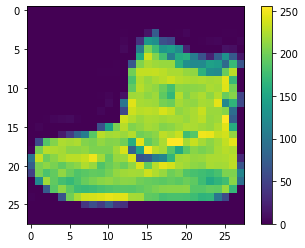

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Normalisierung Bilder
Zum Training normalisieren wir die Bilder in einen Wertebereich von 0 bis 1

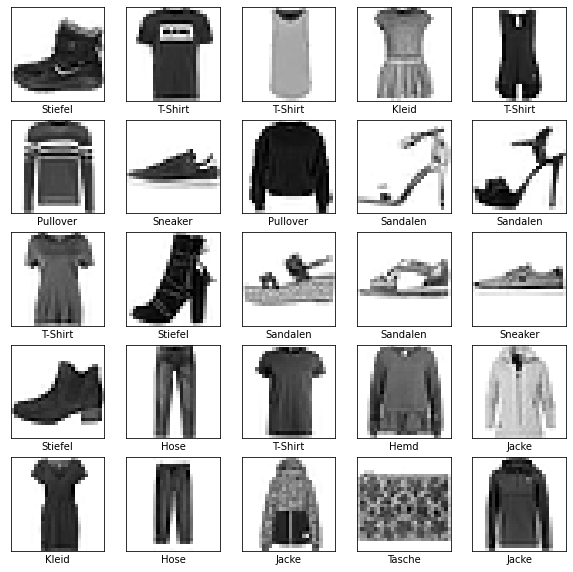

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


#prepare data for network: 
# normalize by mean/std deviation
train_images = (train_images - np.mean(train_images)) / np.std(train_images)
test_images = (test_images - np.mean(test_images)) / np.std(test_images)

train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)
train_labels_1H = np.eye(10)[train_labels]
test_labels_1H = np.eye(10)[test_labels]


# Model 1 (Dense Net)


In [ ]:
def print_history(history_1, history_2):
  acc_1 = history_1.history['accuracy']
  val_acc_1 = history_1.history['val_accuracy']
  acc_2 = history_2.history['accuracy']
  val_acc_2 = history_2.history['val_accuracy']
  
  epochs = range(1, len(acc_1) + 1)

  plt.plot(epochs, acc_1,  label='Training m1 acc', color='blue', linestyle='solid')
  plt.plot(epochs, val_acc_1, label='Validation m1 acc', color='blue', linestyle='dashed')
  plt.plot(epochs, acc_2, label='Training m2 acc', color='green', linestyle='solid')
  plt.plot(epochs, val_acc_2,  label='Validation m2 acc', color='green', linestyle='dashed')
  
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  
  plt.show()

# define the model
model = tf.keras.Sequential(
    [
     tf.keras.Input(shape=(28, 28, 1)),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')
    ]
)
model.summary()

# prepare the model:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

#train the model:
history = model.fit(train_images, train_labels_1H, batch_size=128, epochs=20, validation_split=0.1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 3s 3ms/step - loss: 0.4877 - accuracy: 0.8240 - val_loss: 0.3996 - val_accuracy: 0.8547
Epoch 2/20
422/422 [==============================] - 1s 3ms/step - loss: 0.3640 - accuracy: 0.8679 - val_loss: 0.3636 - val_accuracy: 0.8728
Epoch 3/20
422/422 [==========

# Model 2 Conv Net

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 96)        2496      
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 96)        230496    
                                                                 
 batch_normalization_7 (Batc  (None, 28, 28, 96)       384       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 96)       0         
 2D)                                                             
                                                      

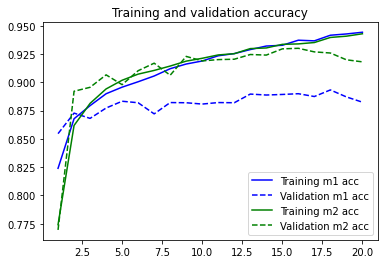

<Figure size 432x288 with 0 Axes>

In [ ]:
model2 = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(96, kernel_size=(5,5), activation="relu", padding="same",  input_shape=(28 ,28, 1)), 
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(96, kernel_size=(5,5), activation="relu", padding="same"), 
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Dropout(0.2),
                             
                             tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"), 
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu", padding="same"), 
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Dropout(0.5),
                              
                              tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation="relu", padding="same"), 
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation="relu", padding="same"), 
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Dropout(0.5),
                              
                             
                             tf.keras.layers.Flatten(), 
                             tf.keras.layers.Dense(1024, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10, activation='softmax')])
model2.summary()

# prepare the model:
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

#train the model:
history_2 = model2.fit(train_images, train_labels_1H, batch_size=128, epochs=20, validation_split=0.1)
print_history(history, history_2)

# Evaluation auf Test Set

Model 1

In [ ]:
model.evaluate(test_images, test_labels_1H, batch_size=128)


79/79 [==============================] - 0s 3ms/step - loss: 0.4010 - accuracy: 0.8782


[0.40100184082984924, 0.8781999945640564]

Model 2:

In [ ]:
model2.evaluate(test_images, test_labels_1H, batch_size=128)

79/79 [==============================] - 1s 8ms/step - loss: 0.2080 - accuracy: 0.9272


[0.20796577632427216, 0.9272000193595886]

# Resultate für Model 1 und 2

In [ ]:
predictions_model_1 = model.predict(test_images)
predictions_model_2 = model2.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(np.squeeze(img, axis=-1), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


num_rows = 5
num_cols = 3
num_images = num_rows*num_cols




# Predictions Model 1

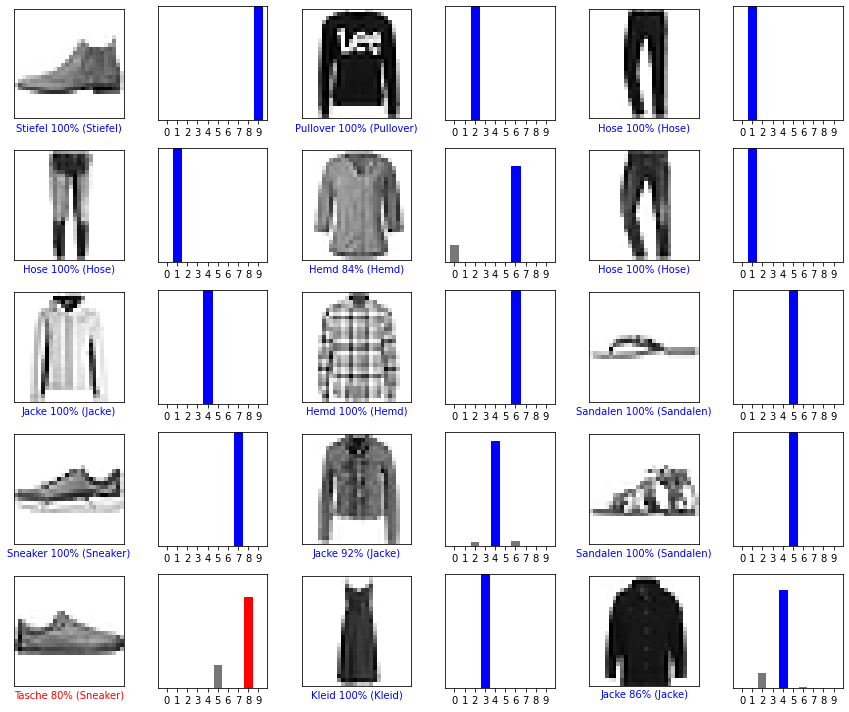

In [ ]:
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_model_1[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_model_1[i], test_labels)
plt.tight_layout()
plt.show()

# Predicitions Model 2

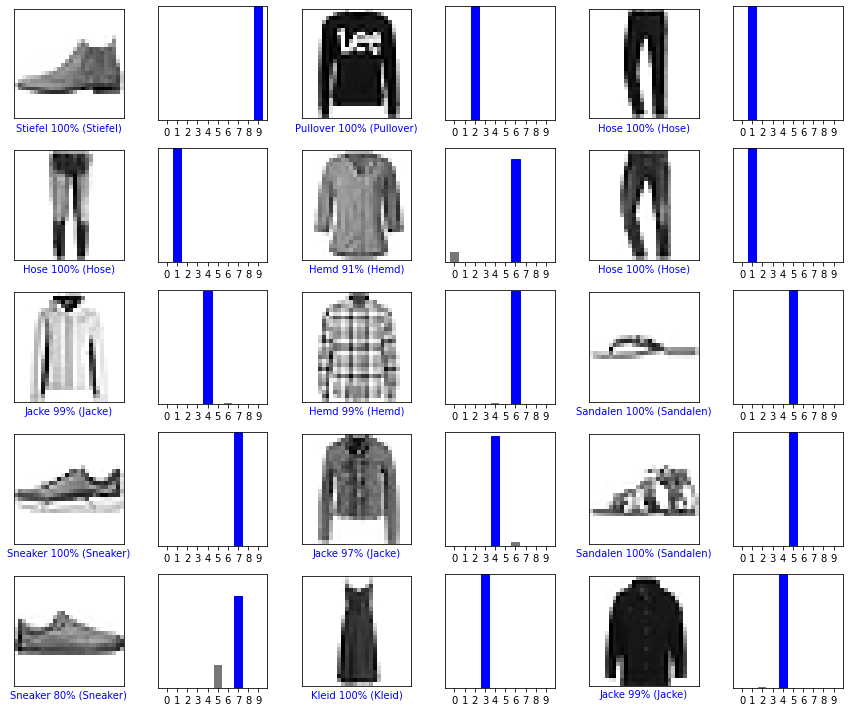

In [ ]:
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_model_2[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_model_2[i], test_labels)
plt.tight_layout()
plt.show()